# News Article Classification

. Overview:
    
In today’s digital world, news articles are constantly being generated and shared across
different platforms. For news organizations, social media platforms, and aggregators,
classifying articles into specific categories such as sports, politics, and technology can help
improve content management and recommendation systems. This project aims to develop a
machine learning model that can classify news articles into predefined categories, such as
sports, politics, and technology, based on their content.
By automating this process, organizations can efficiently categorize large volumes of news
articles, making it easier for readers to access relevant information based on their interests.


Problem Statement:
    
The primary objective of this project is to build a classification model that can automatically
categorize news articles into different predefined categories. The model will be trained using
a labeled dataset of news articles and will output the most likely category (e.g., sports,
politics, or technology) for any given article.
The goal is to:
● Develop a robust classifier capable of handling articles from multiple categories.
● Preprocess the text data, extract meaningful features, and train models to classify the
articles.
● Evaluate the model performance and provide actionable insights on how well it
classifies articles.


### Import Required Libraries

In [1]:
# Basic libraries for data handling
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP and text preprocessing libraries
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

# Train-test split and machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pandas and numpy are used to load and manage the dataset.

matplotlib and seaborn help in visualizing data distributions.

re helps remove unwanted characters using regular expressions.

TfidfVectorizer converts text into numerical form.

scikit-learn provides machine learning models and evaluation metrics.

In [2]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

The nltk.download('stopwords') command is used to download the list of commonly used English stopwords, which are removed during text preprocessing to reduce noise.

The nltk.download('wordnet') command downloads the WordNet dictionary, which is required for lemmatization to convert words into their base forms.

In [3]:
#Load the Dataset
data = pd.read_excel(r"C:\Users\admin\Downloads\data_news.xlsx")

In [4]:
#Preview the Dataset
data.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [5]:
#Check Shape & Info
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  49994 non-null  object
 4   keywords           47294 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


## Task 1 :  Data Collection and Preprocessing

In [6]:
#Check Missing Values
data.isnull().sum()

category                0
headline                0
links                   0
short_description       6
keywords             2706
dtype: int64

We observe that the short_description column has a few missing values, which must be handled before text processing.

In [7]:
#Handle Missing Values
data['short_description'].fillna('', inplace=True)

Missing values in the short_description column are replaced with empty text.

In [8]:
#Exploratory Data Analysis (EDA)
data['category'].value_counts()

WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: category, dtype: int64

This shows the number of articles present in each news category.

It helps identify whether the dataset is balanced or imbalanced.

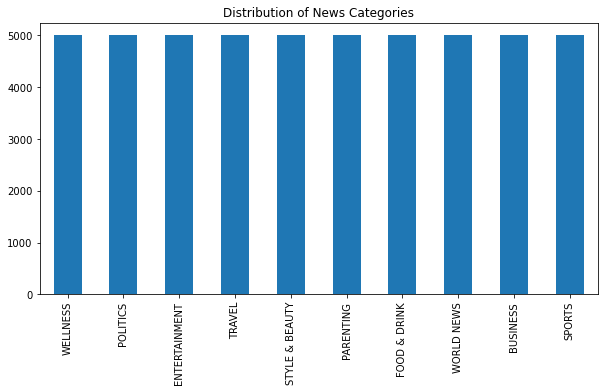

In [9]:
data['category'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribution of News Categories")
plt.show()

The bar chart visually represents the distribution of news articles across different categories

In [10]:
#Combine Text Columns
data['text'] = data['headline'] + " " + data['short_description']

Instead of using only the headline, we combine it with the short description.
This provides more context to the model, improving classification accuracy.

#### Text Cleaning and Preprocessing

In [11]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

data['clean_text'] = data['text'].apply(clean_text)


Converts all text to lowercase to maintain consistency

Removes punctuation, numbers, and special characters

Removes common stopwords like the, is, and

Converts words to their root form using lemmatization

This reduces noise and improves model learning.

## Task 2 : Feature Extraction using TF-IDF

In [12]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['clean_text'])
y = data['category']


Machine learning models cannot understand text directly.
TF-IDF converts text into numerical

X contains the transformed text features

y contains the target category labels

## Task 3. Model Development and Training

In [13]:
#Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Data is split into training and testing sets.

Training data teaches the model.
Testing data evaluates performance on unseen data.

#### Build & Train Models

In [14]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Logistic Regression is used as a baseline model to understand how well a simple classifier performs.

In [15]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)


MultinomialNB()

Naive Bayes is efficient for text data and performs well when word frequencies are important.

In [16]:
#Support Vector Machine
svm = LinearSVC()
svm.fit(X_train, y_train)


LinearSVC()

SVM works very well with high-dimensional sparse data like TF-IDF vectors and usually provides the best results.

In [17]:
#Initial Model Evaluation
for model, name in [(lr,"Logistic Regression"), (nb,"Naive Bayes"), (svm,"SVM")]:
    y_pred = model.predict(X_test)
    print(name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.7947
                precision    recall  f1-score   support

      BUSINESS       0.75      0.77      0.76      1000
 ENTERTAINMENT       0.77      0.77      0.77      1000
  FOOD & DRINK       0.84      0.86      0.85      1000
     PARENTING       0.76      0.77      0.76      1000
      POLITICS       0.76      0.74      0.75      1000
        SPORTS       0.88      0.89      0.88      1000
STYLE & BEAUTY       0.88      0.82      0.85      1000
        TRAVEL       0.79      0.77      0.78      1000
      WELLNESS       0.72      0.76      0.74      1000
    WORLD NEWS       0.82      0.78      0.80      1000

      accuracy                           0.79     10000
     macro avg       0.80      0.79      0.79     10000
  weighted avg       0.80      0.79      0.79     10000

Naive Bayes
Accuracy: 0.7798
                precision    recall  f1-score   support

      BUSINESS       0.75      0.71      0.73      1000
 ENTERTAINMENT       0.79      0.7

This compares model performance using accuracy, precision, recall, and F1-score.

#### Hyperparameter Tuning with Cross-Validation

In [18]:
#Logistic Regression
grid_lr = GridSearchCV(
    LogisticRegression(
        max_iter=1000,
        solver='saga',        
        n_jobs=-1
    ),
    {'C': [1, 10]},          
    cv=3,                   
    scoring='accuracy',
    verbose=1
)

grid_lr.fit(X_train, y_train)



Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, n_jobs=-1,
                                          solver='saga'),
             param_grid={'C': [1, 10]}, scoring='accuracy', verbose=1)

cross-validation is used to find the best regularization parameter for Logistic Regression.

In [19]:
#Naive Bayes
grid_nb = GridSearchCV(
    MultinomialNB(),
    {'alpha': [0.1, 0.5, 1.0]},
    cv=3
)

grid_nb.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0]})

Cross-validation helps select the best smoothing value for Naive Bayes.

In [20]:
#SVM
grid_svm = GridSearchCV(
    LinearSVC(max_iter=3000),
    {'C': [1, 10]},
    cv=3,
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=LinearSVC(max_iter=3000), n_jobs=-1,
             param_grid={'C': [1, 10]})

Cross-validation ensures the SVM model generalizes well across different data splits.

## Task 4 :Final Model Evaluation & Comparison

In [21]:
best_models = {
    "Logistic Regression": grid_lr.best_estimator_,
    "Naive Bayes": grid_nb.best_estimator_,
    "SVM": grid_svm.best_estimator_
}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.7946
                precision    recall  f1-score   support

      BUSINESS       0.75      0.77      0.76      1000
 ENTERTAINMENT       0.77      0.77      0.77      1000
  FOOD & DRINK       0.84      0.86      0.85      1000
     PARENTING       0.76      0.77      0.76      1000
      POLITICS       0.76      0.74      0.75      1000
        SPORTS       0.88      0.89      0.88      1000
STYLE & BEAUTY       0.88      0.82      0.85      1000
        TRAVEL       0.79      0.77      0.78      1000
      WELLNESS       0.72      0.76      0.74      1000
    WORLD NEWS       0.82      0.78      0.80      1000

      accuracy                           0.79     10000
     macro avg       0.80      0.79      0.79     10000
  weighted avg       0.80      0.79      0.79     10000

Naive Bayes
Accuracy: 0.7798
                precision    recall  f1-score   support

      BUSINESS       0.75      0.71      0.73      1000
 ENTERTAINMENT       0.79      0.7

Evaluates tuned models on unseen test data.

Compares final performance.

and select the best classifier.

Support Vector Machine (SVM) achieved the highest and most consistent performance across all metrics and was selected as the final model.

In this project, NLP techniques were used to classify news articles into predefined categories. After preprocessing and TF-IDF feature extraction, multiple machine learning models were trained and evaluated. Hyperparameter tuning with 5-fold cross-validation ensured robust model performance. Among all models, the SVM classifier achieved the best results and was selected as the final model.

## Conclusion


This project successfully implemented an end-to-end News Article Classification system using NLP techniques.
Starting from data collection and preprocessing to feature extraction, model training, hyperparameter tuning, and evaluation, each step was carefully executed.


## Key outcomes:

NLP preprocessing significantly improved data quality

TF-IDF effectively transformed text into meaningful numerical features

Cross-validation ensured robust model performance

SVM emerged as the best-performing model

The final model can accurately classify unseen news articles into appropriate categories, demonstrating the effectiveness of machine learning in automated content classification.

video--https://www.loom.com/share/7f596f3f0ed7421ca41aba9d20d428a5

drive--https://drive.google.com/file/d/1sEZVzphN7z4X6XSGBZHoiH0u9sKZR4XT/view?usp=drivesdk